In [ ]:
!pip install ultralytics
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=3643ed7a212008dde3a6b28fefb2efac25c957f4bba135a9fd81bc14e7bf5011
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      

In [ ]:
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import display, Image
import os
import torch
import random
import numpy as np

In [ ]:
np.random.seed(42)

In [ ]:
def monitorTensorboard():
  %load_ext tensorboard
  %tensorboard --logdir runs/detect/train2

In [ ]:
if not os.path.exists('/content/GunDetectionMCD-7/train'):
  rf = Roboflow(api_key="lP736P3xuUbiX3bIVhbL")
  project = rf.workspace("mcd-fz7gc").project("gundetectionmcd")
  dataset = project.version(7).download("yolov8")
else:
  print('Dataset already present')

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.141, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to GunDetectionMCD-7 in yolov8:: 100%|██████████| 20012/20012 [00:02<00:00, 9264.13it/s] 


In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 24.6MB/s]


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data='/content/GunDetectionMCD-7/data.yaml' epochs=700 imgsz=416 batch=32 seed=42 plots=True
#model.train(data='/content/GunDetectionMCD-3/data.yaml', epochs=EPOCHS, imgsz=IMGSZ)

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/GunDetectionMCD-7/data.yaml, epochs=700, patience=50, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False,

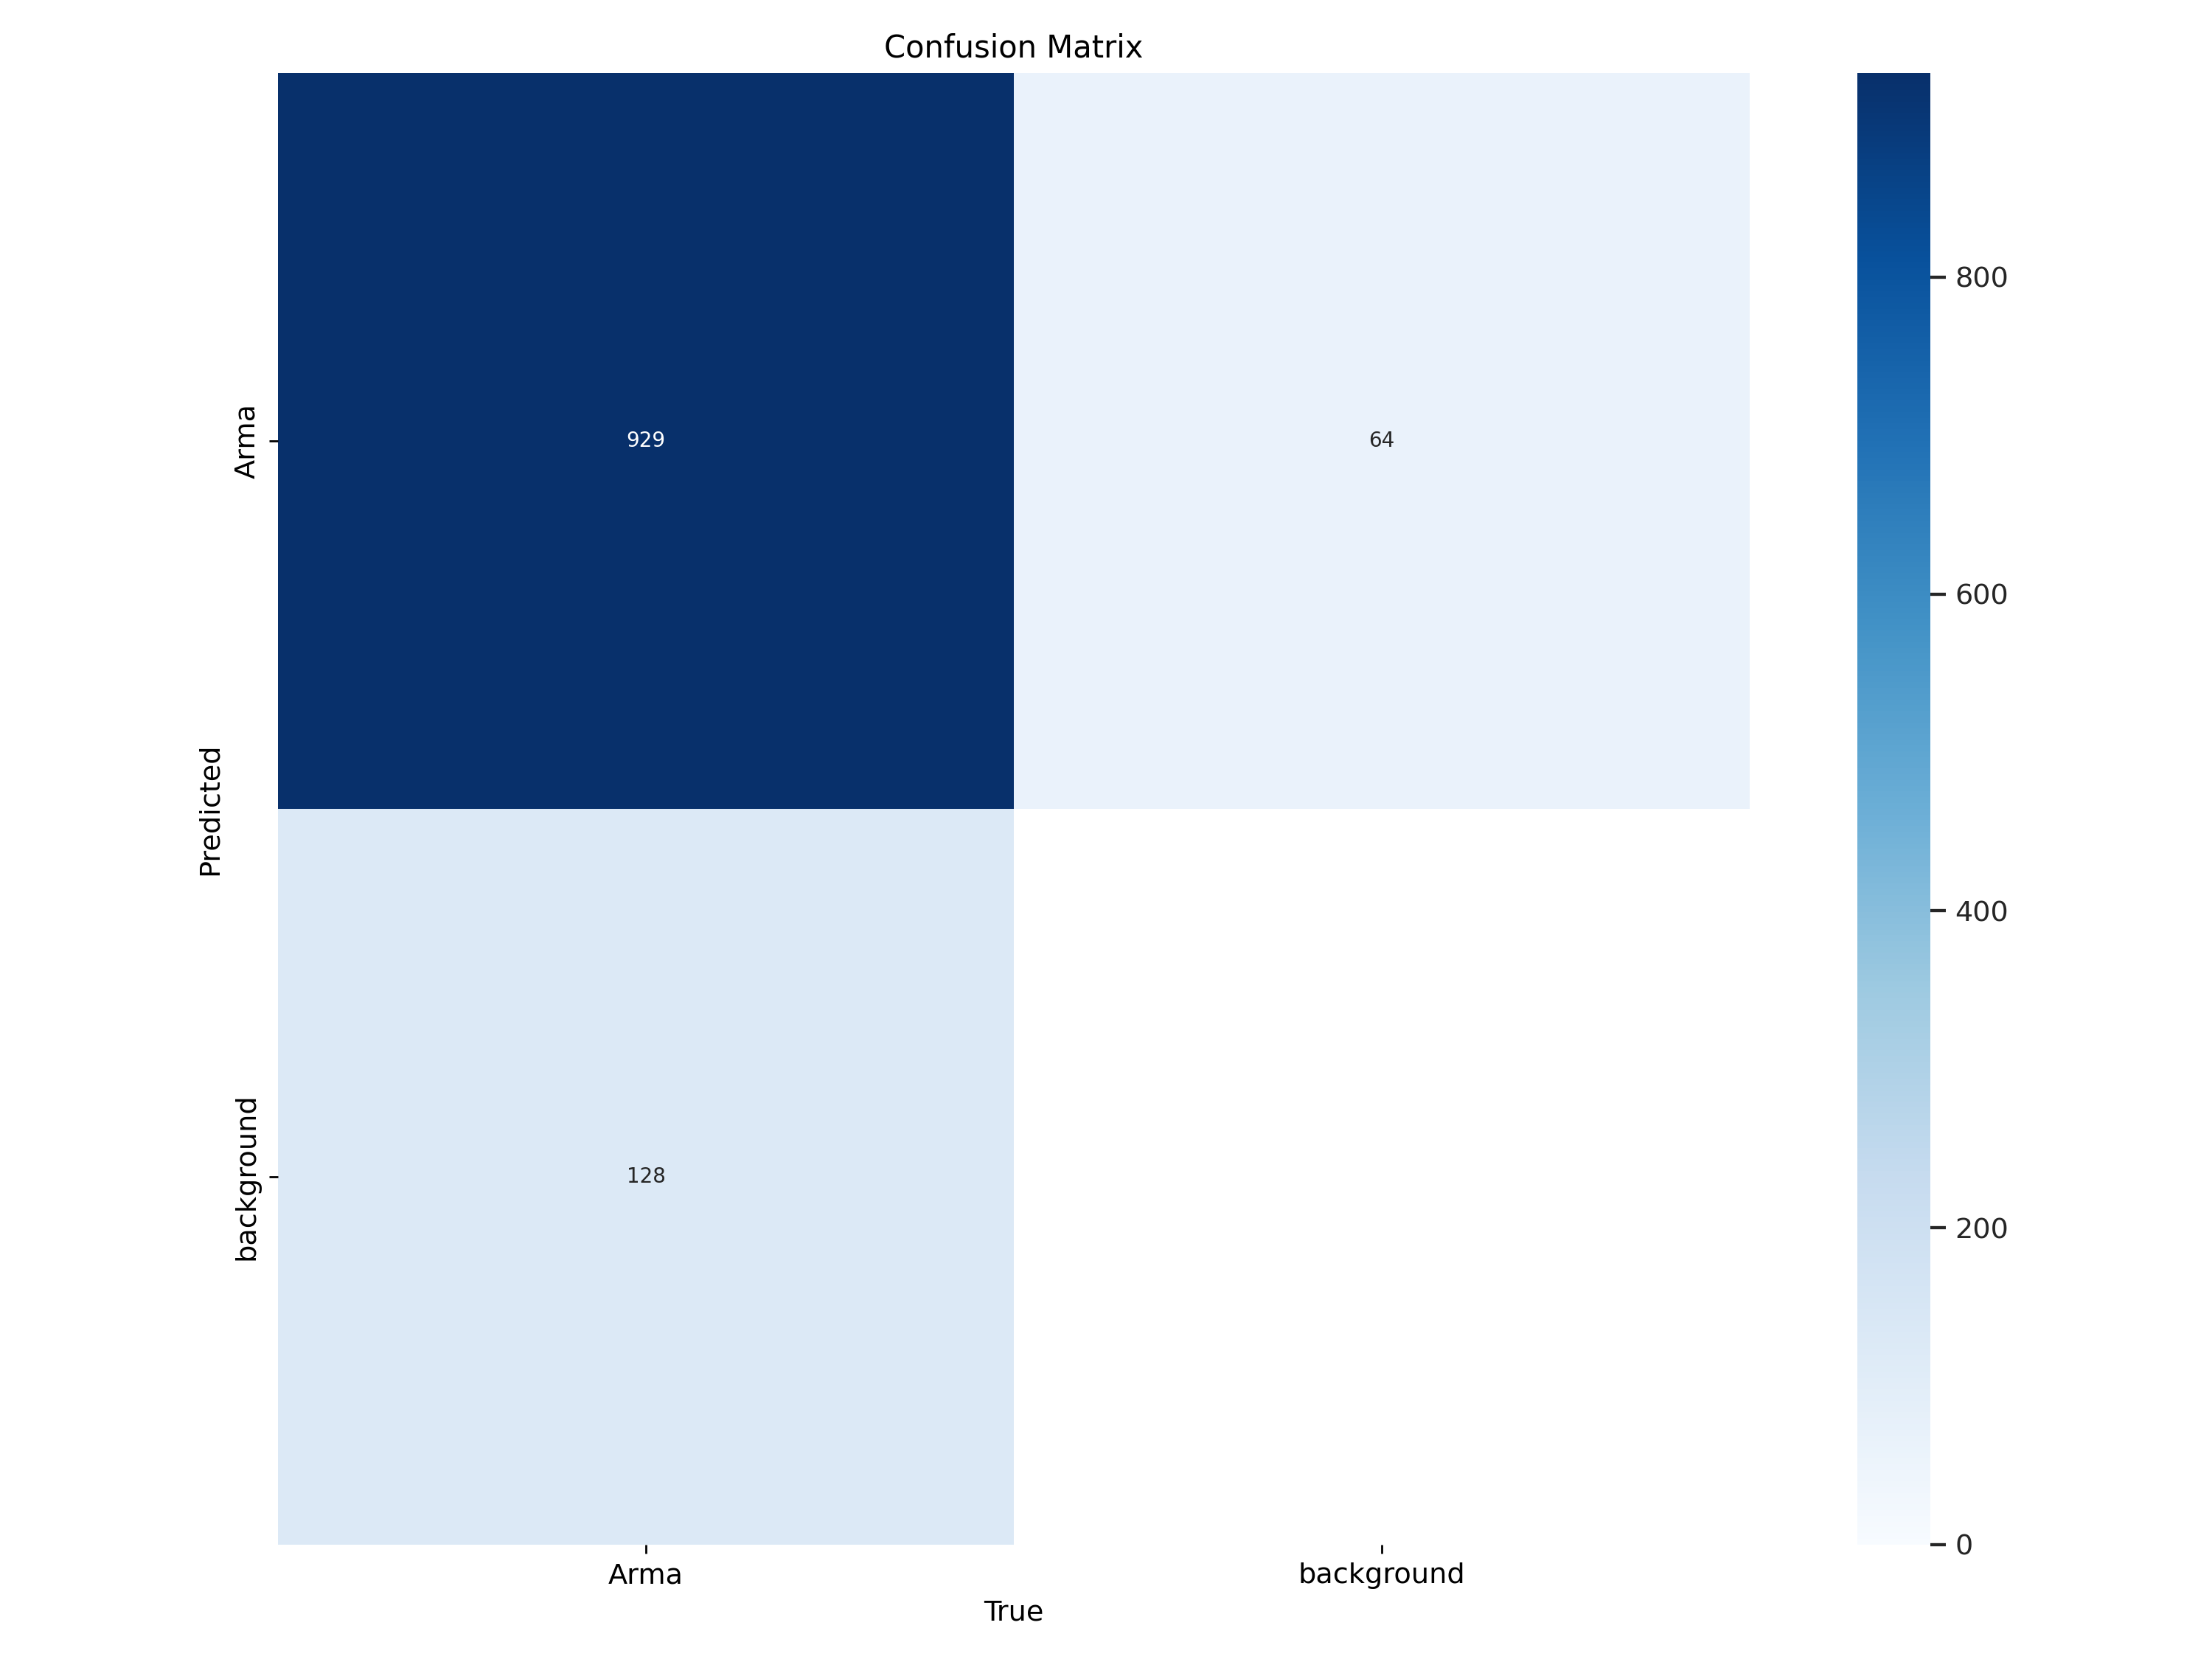

In [ ]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

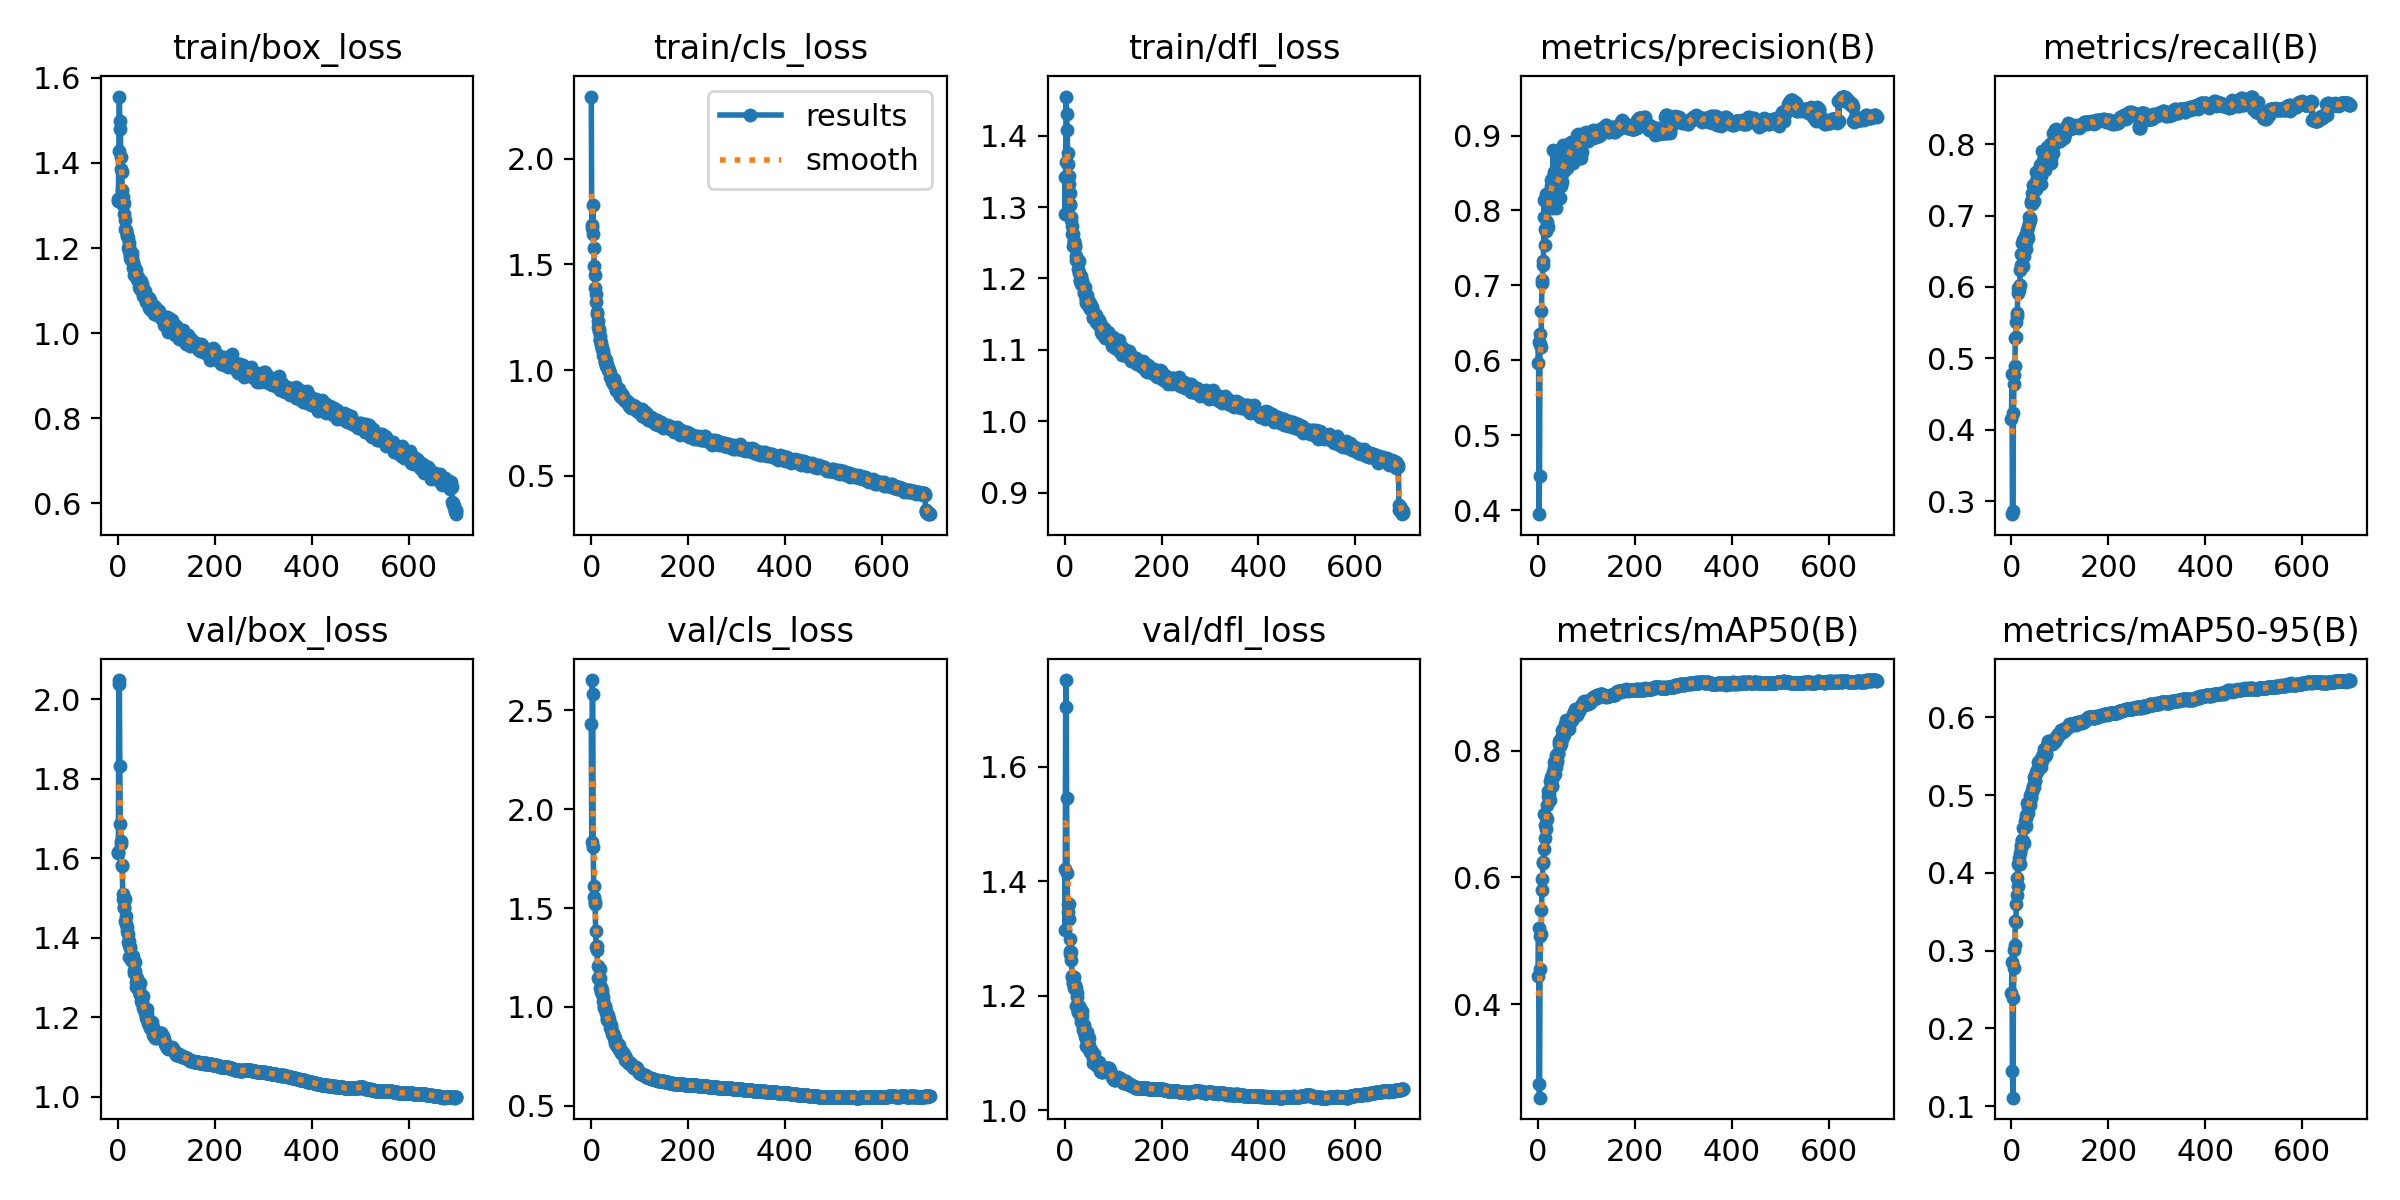

In [ ]:
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

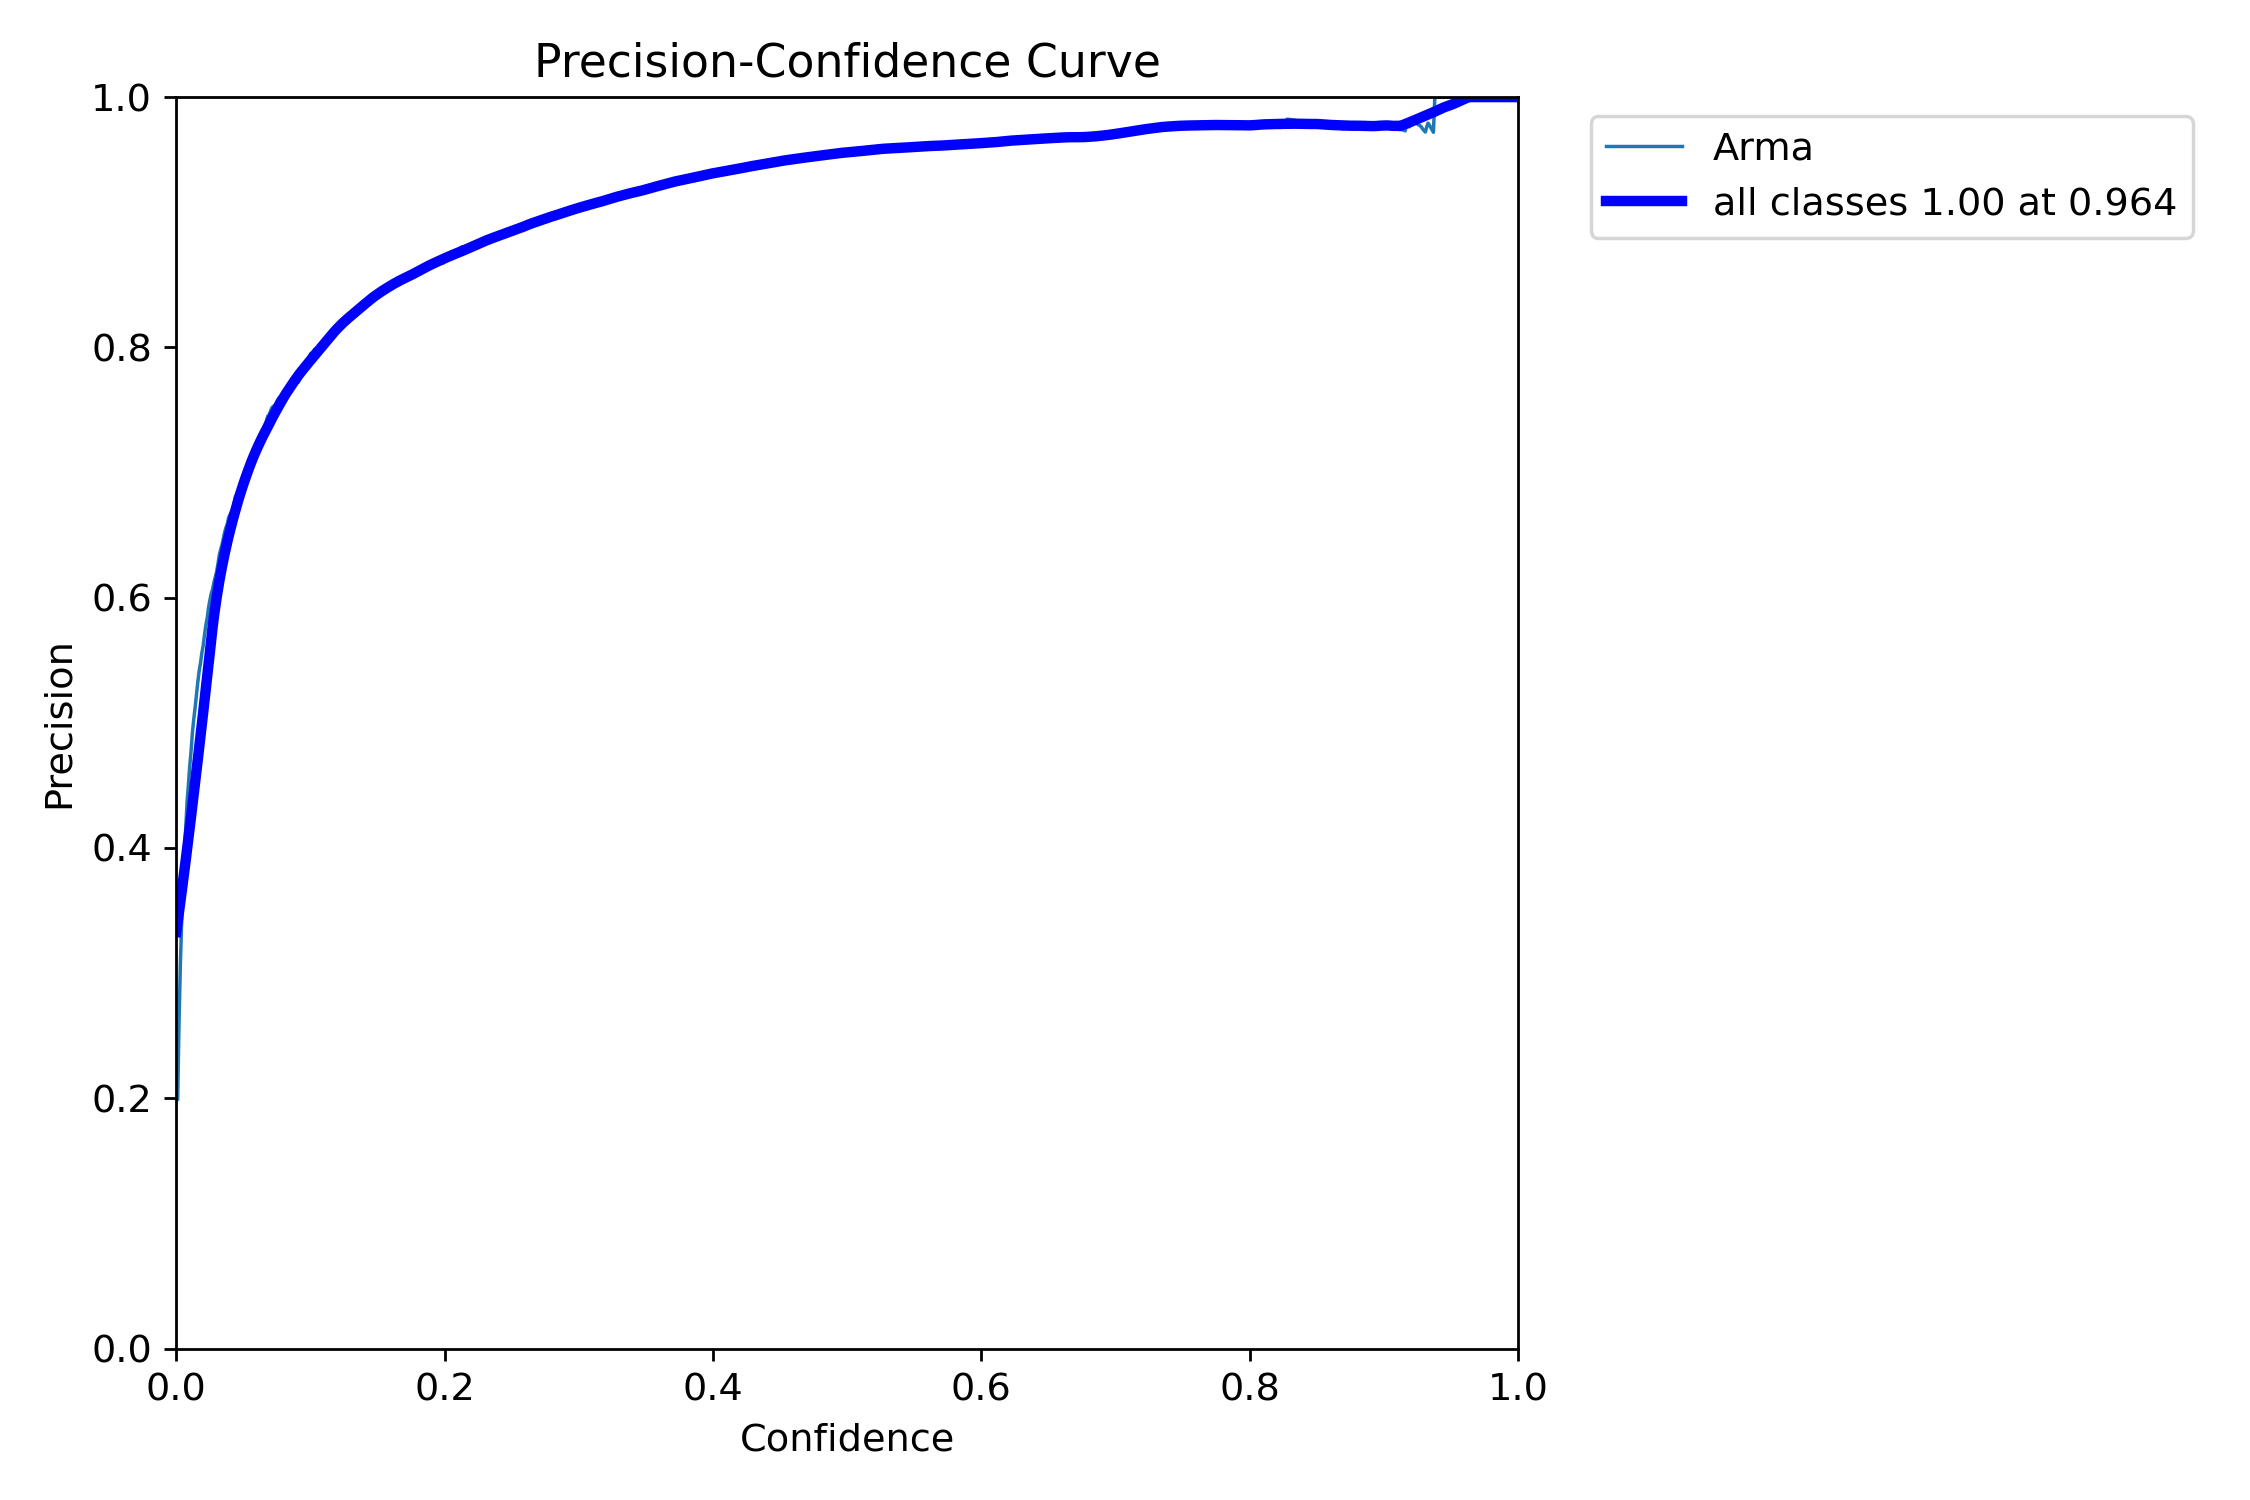

In [ ]:
Image(filename=f'/content/runs/detect/train2/P_curve.png', width=600)

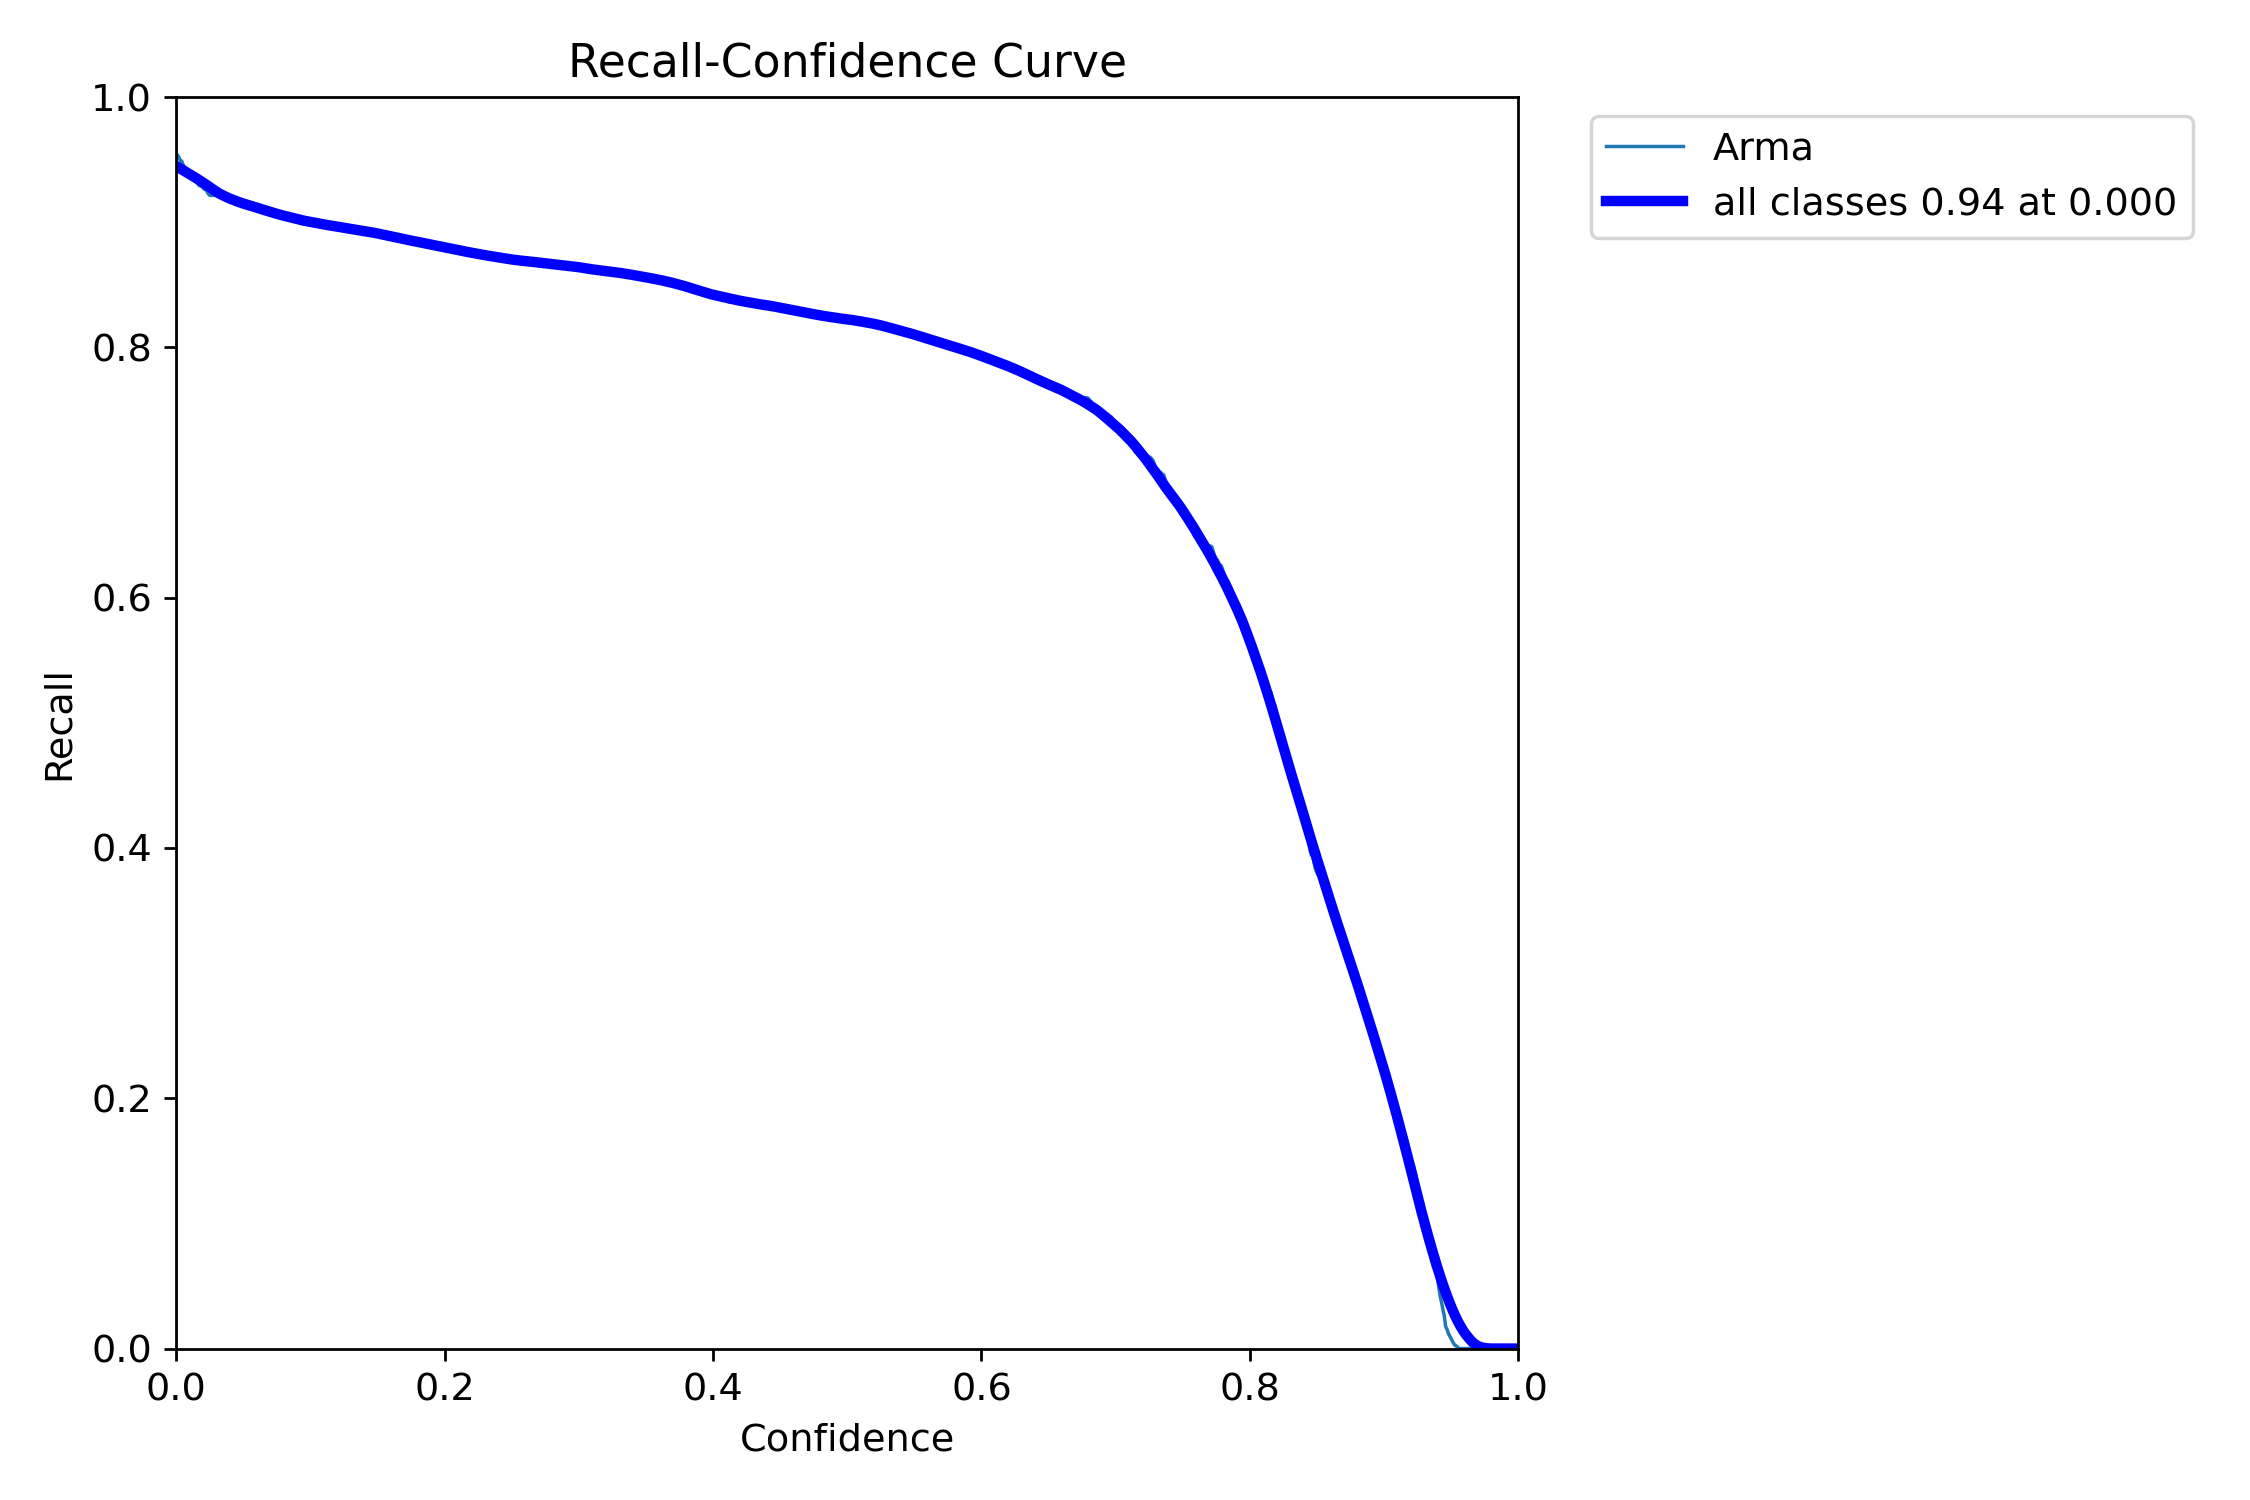

In [ ]:
Image(filename=f'/content/runs/detect/train2/R_curve.png', width=600)

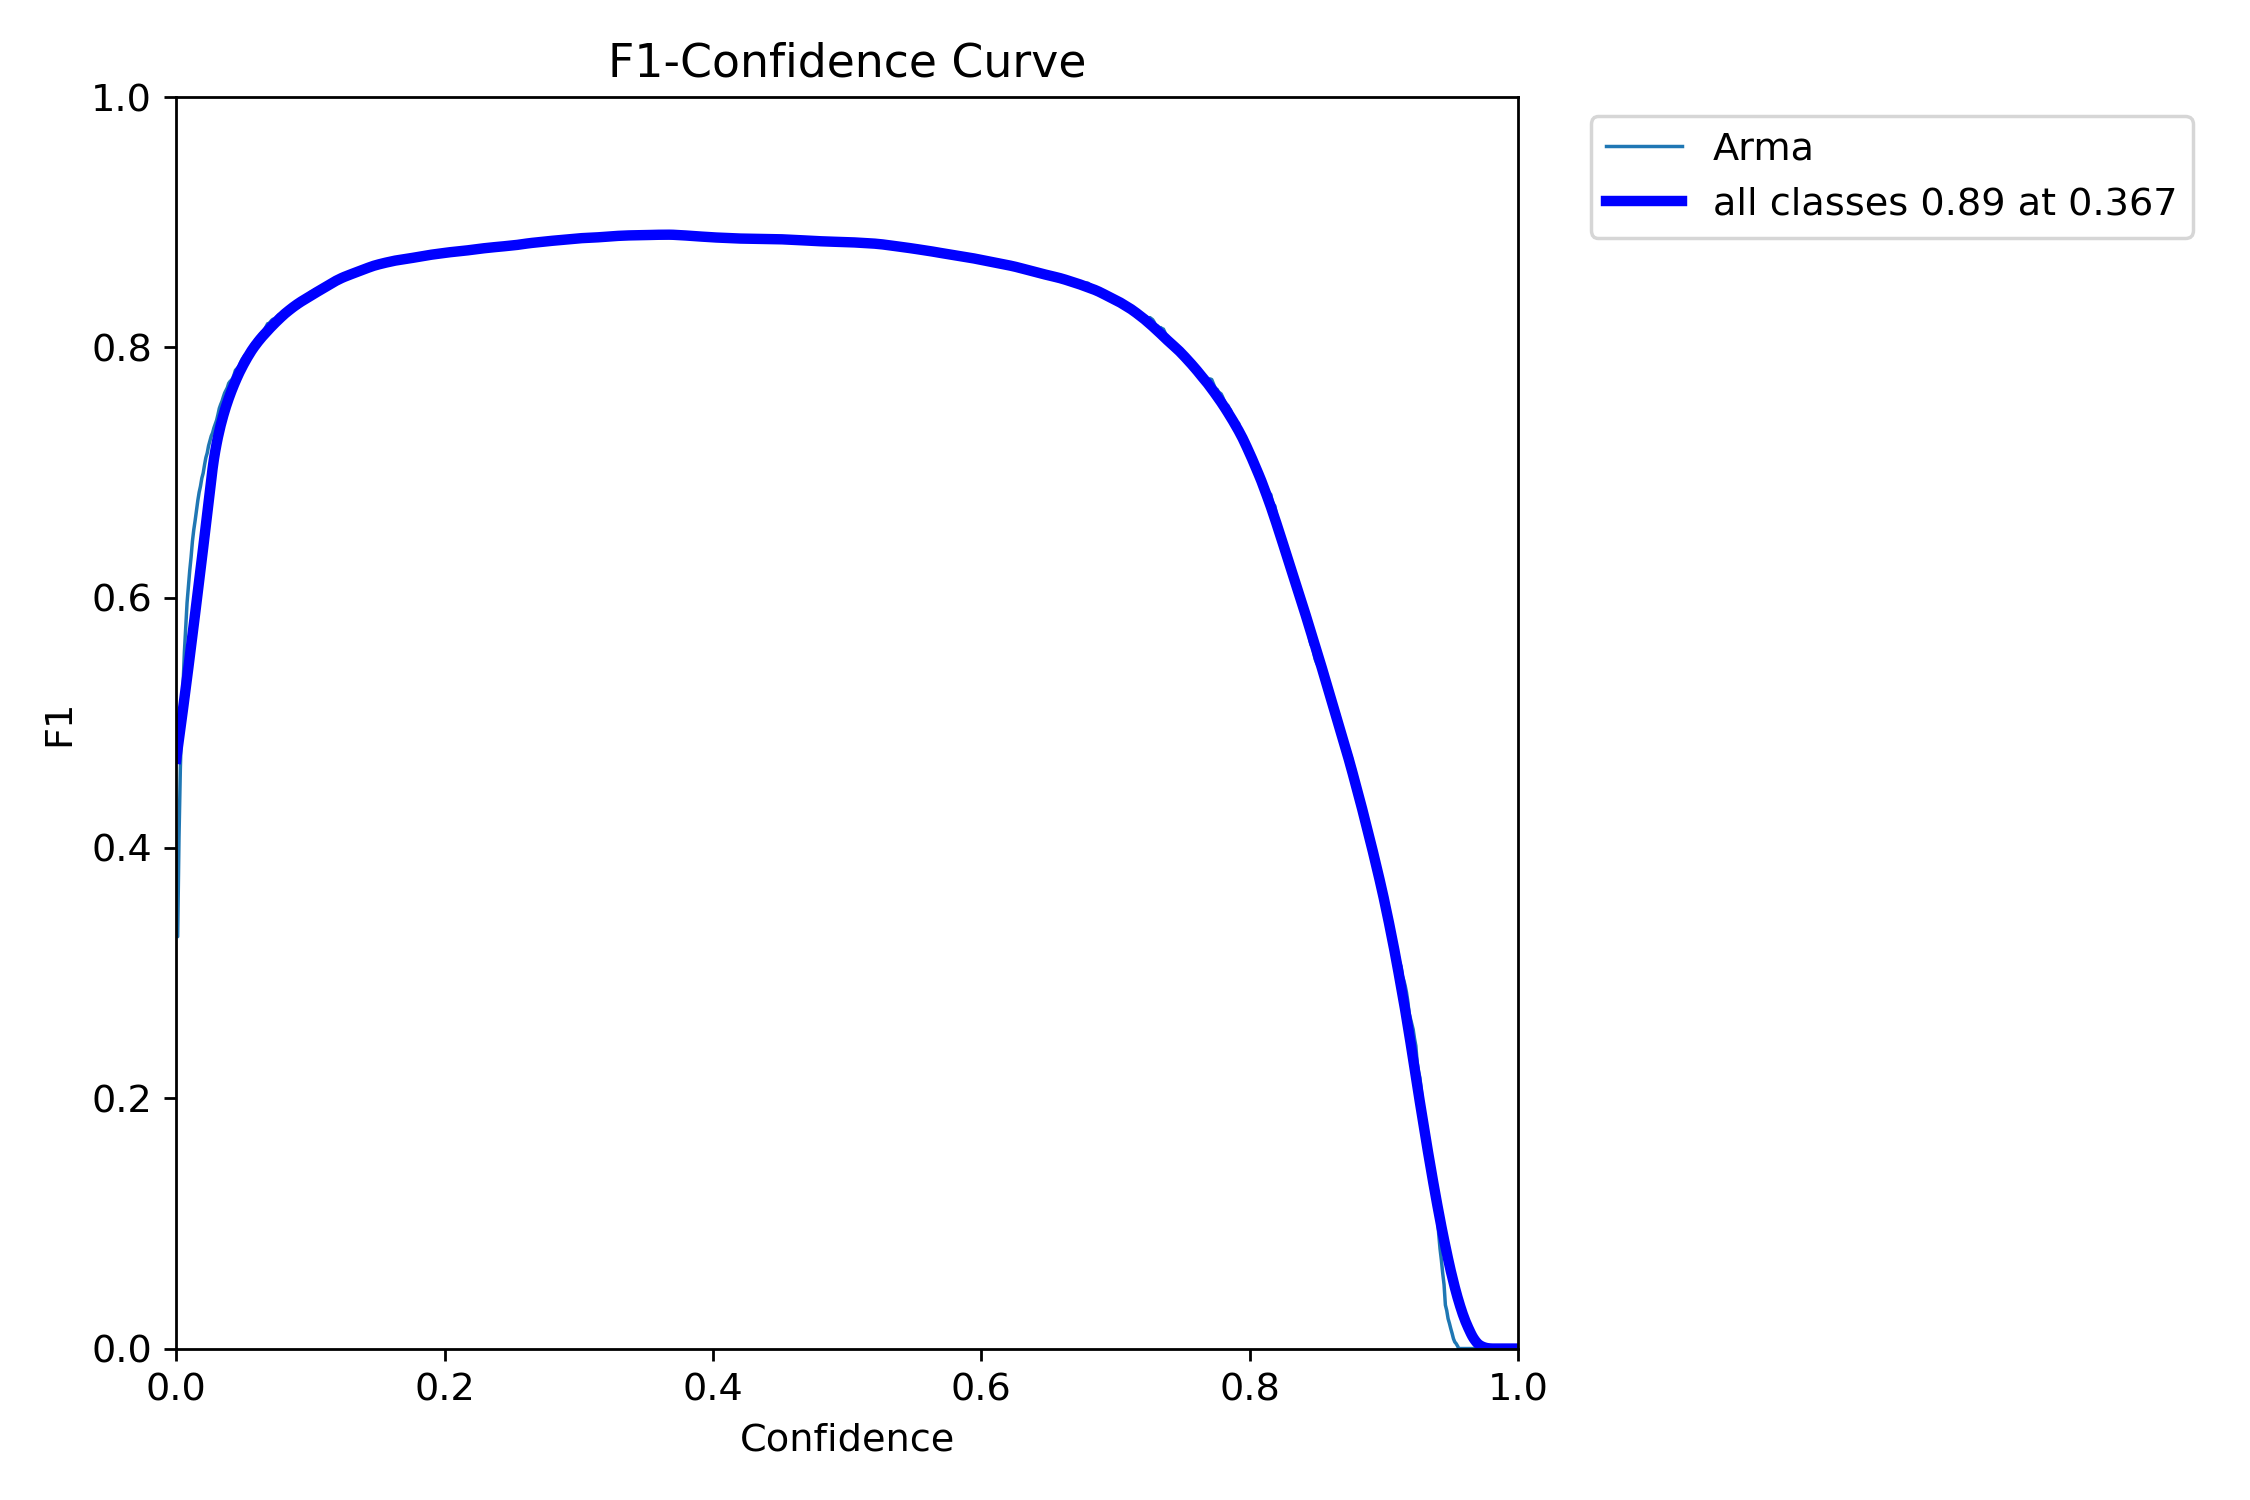

In [ ]:
Image(filename=f'/content/runs/detect/train2/F1_curve.png', width=600)

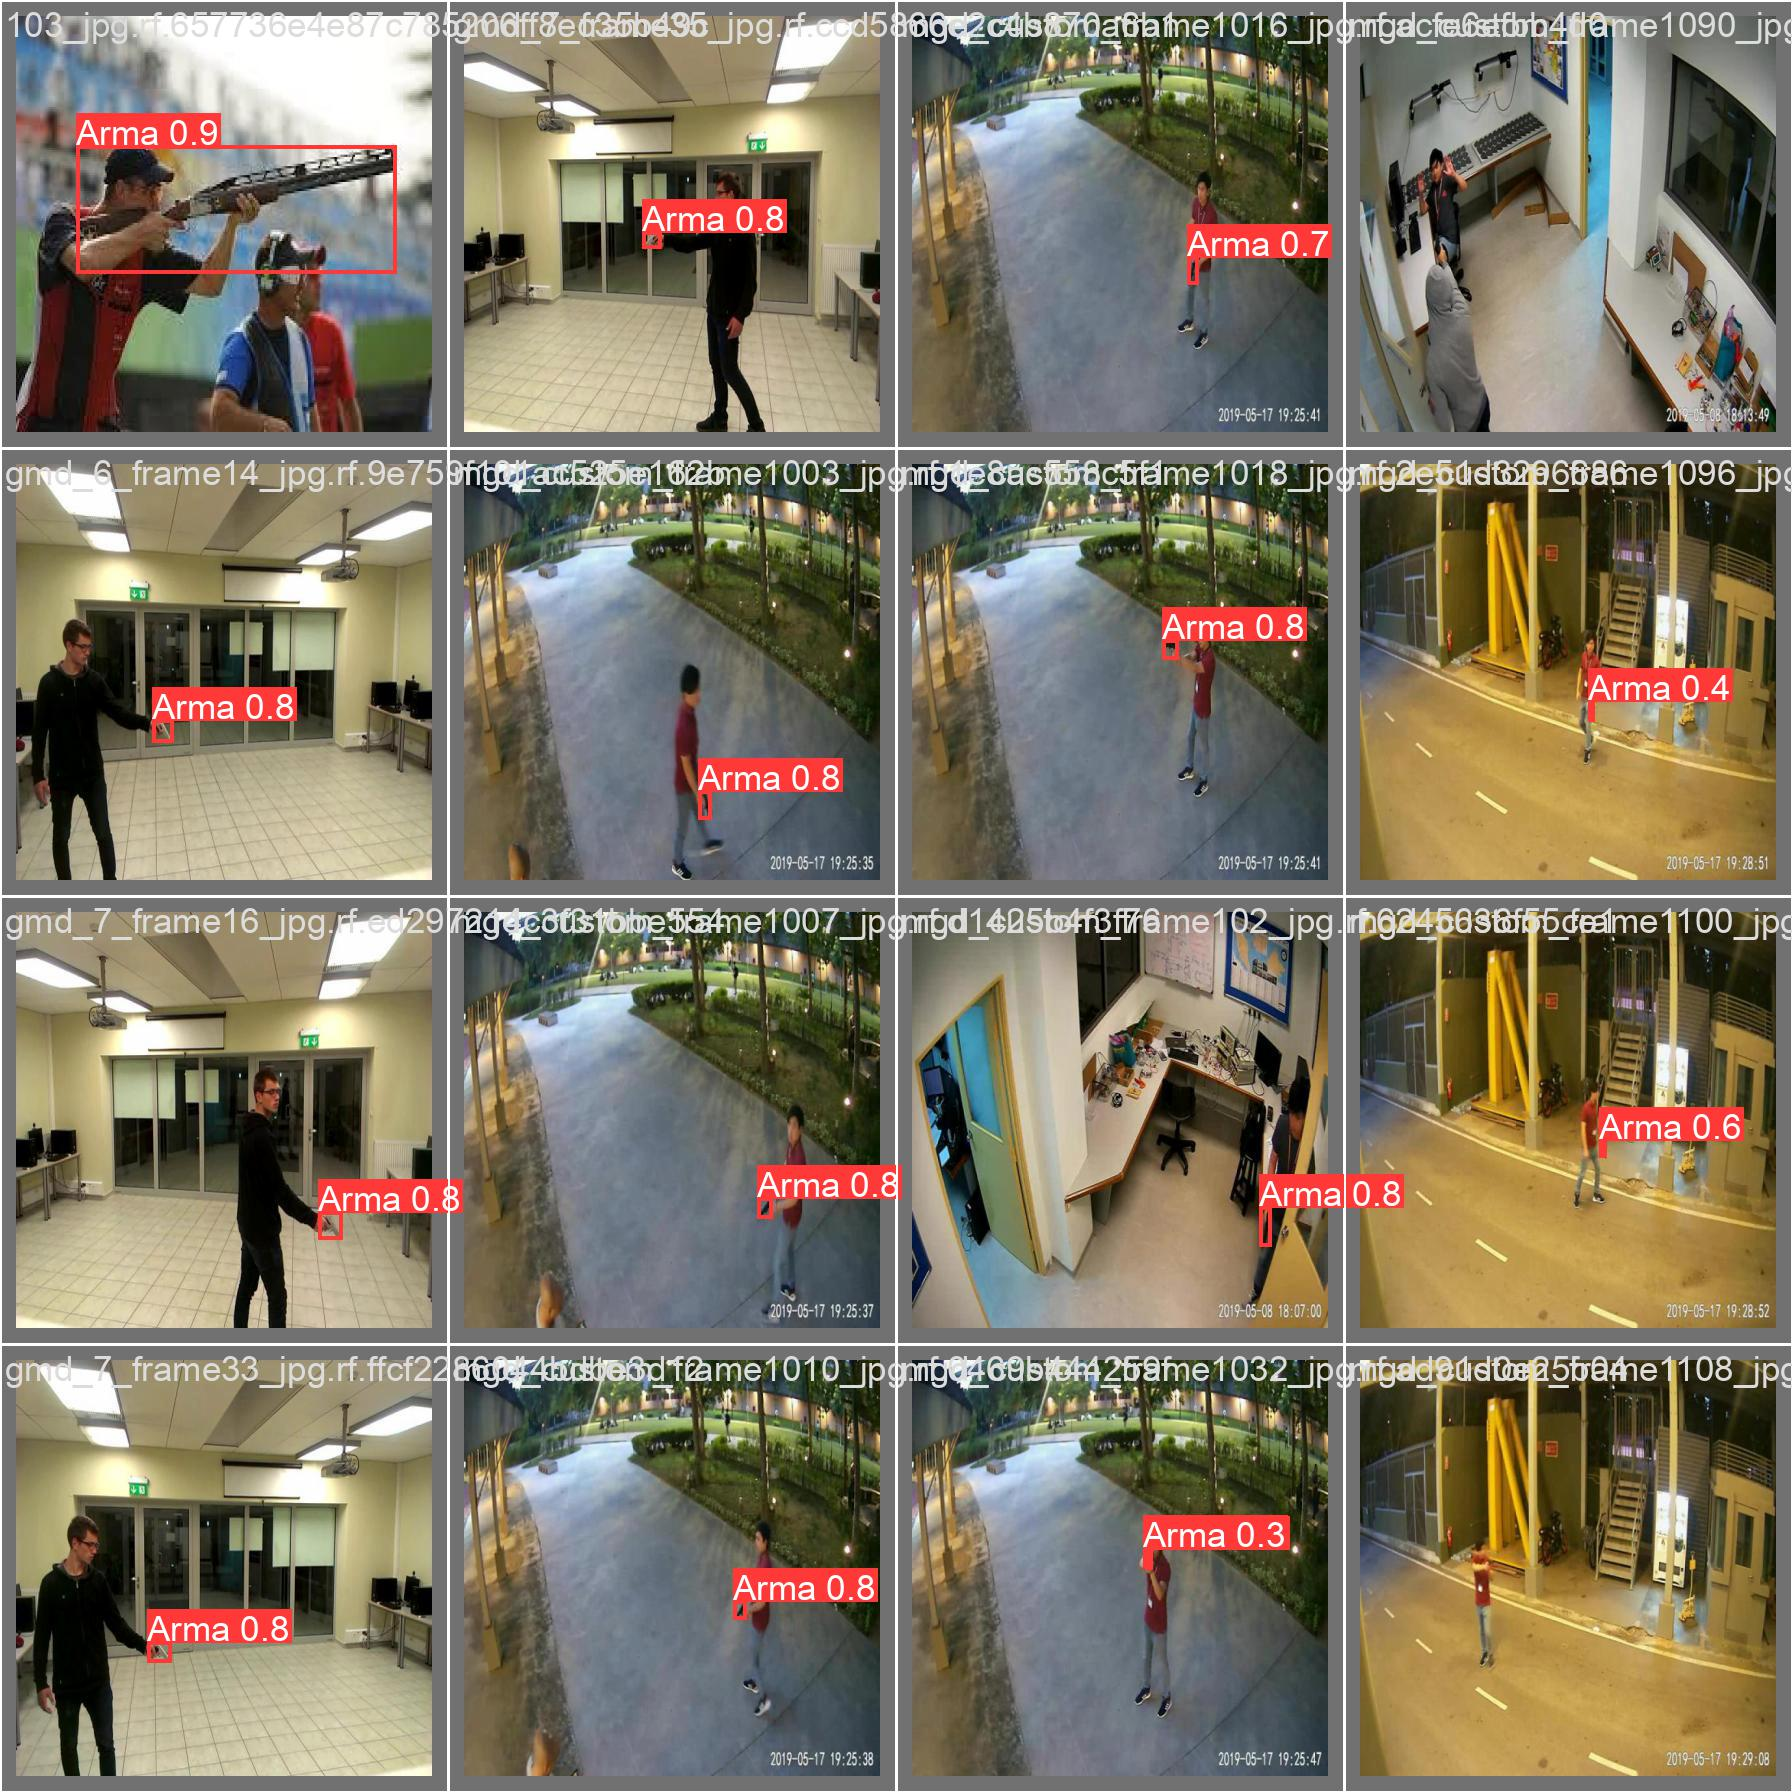

In [ ]:
Image(filename=f'/content/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [ ]:
monitorTensorboard()

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

In [ ]:
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.65 source='/content/GunDetectionMCD-7/test/images' save=True

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/1000 /content/GunDetectionMCD-7/test/images/102_jpg.rf.4454f05406e105a0121c4df71f9473f6.jpg: 416x416 (no detections), 6.4ms
image 2/1000 /content/GunDetectionMCD-7/test/images/105_jpeg_jpg.rf.db4e6026ee801fe6eb38296a06e5e10a.jpg: 416x416 1 Arma, 5.9ms
image 3/1000 /content/GunDetectionMCD-7/test/images/109_jpeg_jpg.rf.495da48ab4eb5842bd2cbd846304a337.jpg: 416x416 1 Arma, 6.1ms
image 4/1000 /content/GunDetectionMCD-7/test/images/11091030-3-_jpg.rf.a17216600e06008c4d34119ea420df7d.jpg: 416x416 (no detections), 6.7ms
image 5/1000 /content/GunDetectionMCD-7/test/images/112371022-6-_jpg.rf.b742e6d098541b8a6deb66b6c8faf628.jpg: 416x416 (no detections), 5.8ms
image 6/1000 /content/GunDetectionMCD-7/test/images/112_jpeg_jpg.rf.7d1aa1ebec4136b13983109f29d94ea1.jpg: 416x416 1 Arma, 5.7ms
image 7/1000 /content/GunDetectionM

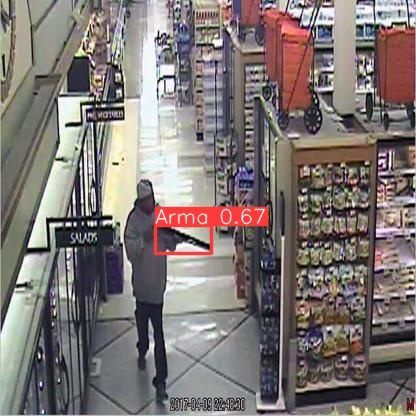

In [ ]:
Image(filename=f'/content/runs/detect/predict/479_jpg.rf.fce3432918f0b8b00baca2aa24781ab8.jpg', width=600)

In [ ]:
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.65 source="https://www.youtube.com/watch?v=1kOqHQbLCo4" save=True

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

requirements: Ultralytics requirements ['pafy', 'youtube_dl==2020.12.2'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.7s, installed 2 packages: ['pafy', 'youtube_dl==2020.12.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

1/1: https://www.youtube.com/watch?v=1kOqHQbLCo4... Success ✅ (955 frames of shape 486x360 at 29.97 FPS)

0: 320x416 (no detections), 291.0ms
0: 320x416 (no detections), 6.4ms
0: 320x416 (no detections), 5.9ms
0: 320x416 (no detections), 5.8ms
0: 320x416 (no detections), 5.8ms
0: 320x416 (no detections), 5.8ms
0: 320x416 (no detections), 5.8ms
0: 320x416 (no detections), 5.8ms
0: 320x416 (no detections), 5.7ms
0: 320x416 (no detections), 5.7ms
0: 320x416 (no detec

In [ ]:
!yolo export model='/content/runs/detect/train2/weights/best.pt' format=onnx  # export custom trained model

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

PyTorch: starting from '/content/runs/detect/train2/weights/best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 5, 3549) (5.9 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 69.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.1s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.0 opset 17...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 6.8s, saved as '/content/runs/detect/train2/weights/best.onnx' (11.6 MB)

Export complete (